In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df=pd.read_csv("Car pridiction.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [14]:
df.keys()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [18]:
df.shape 

(4340, 8)

In [20]:
df.isnull().sum().sum()

0

In [22]:
df.head(5)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [24]:
df.tail(6)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [26]:
from sklearn.preprocessing import LabelEncoder

obj_cols = ['name',	'year'	,'selling_price','km_driven','fuel','seller_type','transmission','owner']
for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,13,17,474,4,1,1,0
1,1041,13,60,335,4,1,1,0
2,505,18,236,607,1,1,1,0
3,118,23,114,309,4,1,1,0
4,279,20,193,681,1,1,1,2


# data vusualization

In [28]:
import seaborn as sns

Text(0, 0.5, 'seller_type')

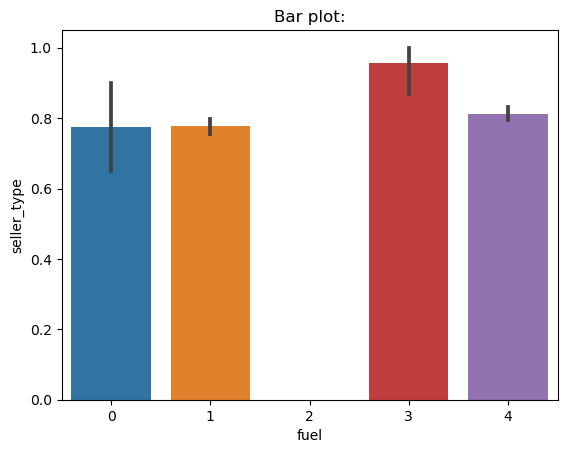

In [30]:
sns.barplot(x='fuel',y='seller_type',data=df)
plt.title('Bar plot:')
plt.xlabel('fuel')
plt.ylabel('seller_type')

Text(0, 0.5, 'selling_price')

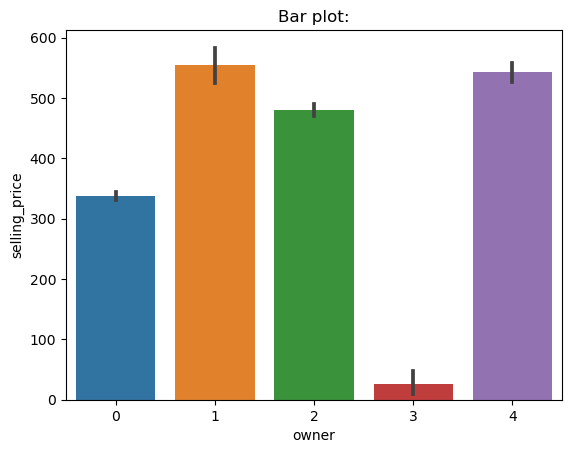

In [32]:
sns.barplot(x='owner',y='km_driven', data=df)
plt.title('Bar plot:')
plt.xlabel('owner')
plt.ylabel('selling_price')

# split data

In [34]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (4340, 7)
Shape of y =  (4340,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (3472, 7)
Shape of y_train =  (3472,)
Shape of X_test =  (868, 7)
Shape of y_test =  (868,)


# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression - ML Model Training

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [191]:
lr.coef_

array([ -1.66585133,  50.20382156,  -9.7403552 , -32.96545331,
        -2.16042906, -34.24727044,  -4.80914429])

In [44]:
lr.intercept_

175.0043202764977

# Predict the value of Car and Test

In [126]:
X_test[0, :]

array([-0.38548956, -0.26680106,  0.68353597, -0.96903266,  0.44661914,
        0.34693142, -0.66500743])

In [46]:
lr.predict([X_test[0, :]])

array([177.89054733])

In [134]:
lr.predict(X_test)

array([ 177.89054733,  214.93146449,   62.17337578,   63.77320078,
        248.98392589,  196.17466642,  151.09729359,  121.5720151 ,
        211.06810276,  162.12683043,   42.87890787,  203.91994831,
        189.15156377,  197.20277828,  235.20460967,  155.59361191,
        194.9951285 ,  251.40818432,  227.77655152,  187.91656995,
        350.47268314,  206.52718279,  177.79727347,  192.32014176,
        185.02047463,  215.00571685,  176.02304404,  165.36695708,
        177.78478628,  121.97439646,  251.16676534,  253.82927891,
        154.85038252, -103.42527678,  216.42984936,  222.79638064,
        201.50216756,  190.03487843,  131.63909133,   27.61953943,
        164.74049931,   53.76269504,  186.21662613,  197.92508502,
        208.42939785,  184.10319745,  124.75669337,  193.43797812,
        257.24877365,  166.71187312,  149.04168718,  204.06489129,
        304.75842748,  177.0989427 ,   39.26408681,  234.42728061,
        126.73391157,  176.92733267,  182.41556396,  246.00385

In [48]:
y_test

3385    156
759     178
960      31
184     126
3373    260
       ... 
2192    182
3426    169
623     372
3651     31
1259     27
Name: selling_price, Length: 868, dtype: int64

In [52]:
lr.score(X_test, y_test)

0.624743811786382

# Implementing Ridge and Lasso Regression

In [54]:
from sklearn.linear_model import Ridge, Lasso


In [56]:
rd = Ridge()

rd.fit(X_train,y_train)

rd.score(X_test, y_test)

0.62474684900763

In [58]:
ls = Lasso()

ls.fit(X_train,y_train)

ls.score(X_test, y_test)

0.6241137012941294

In [60]:
rd2 = Ridge(alpha = 2)

rd2.fit(X_train,y_train)

rd2.score(X_test, y_test)

0.6247498100240185

# Polynomial Linear Regression - ML Model Training

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [67]:
X_train_poly.shape, X_test_poly.shape

((3472, 36), (868, 36))

In [69]:
lr = LinearRegression()

lr.fit(X_train_poly, y_train)


LinearRegression()

In [71]:
lr.score(X_test_poly, y_test,)

0.6802362705463136

In [73]:
lr.predict([X_test_poly[0,:]])

array([147.98706055])

In [75]:
y_pred = lr.predict(X_test_poly)
y_pred

array([147.98706055, 210.78979492,  56.98339844,  68.99072266,
       256.46289062, 177.26977539, 170.26391602, 123.36303711,
       207.53417969, 127.16699219,  50.61083984, 217.16333008,
       175.0246582 , 174.64453125, 228.56396484, 116.35717773,
       200.24023438, 268.88256836, 258.09545898, 173.74707031,
       416.60546875, 204.61425781, 166.86621094, 203.72924805,
       157.87841797, 268.77954102, 189.58032227, 190.20800781,
       166.8215332 ,  86.6953125 , 270.24560547, 275.03466797,
       123.18994141,  32.3815918 , 196.23388672, 231.69067383,
       180.49829102, 184.27075195, 126.47119141,  67.39990234,
       170.06176758,  59.34863281, 178.68847656, 175.16162109,
       216.93725586, 164.55834961, 100.47607422, 182.69921875,
       256.53540039, 162.85375977, 140.13085938, 223.72460938,
       238.92871094, 167.92016602,  67.92163086, 230.63696289,
       118.32226562, 164.45263672, 157.68115234, 288.85546875,
       230.52294922, 194.34667969, 193.05175781, 114.65

In [77]:
y_test

3385    156
759     178
960      31
184     126
3373    260
       ... 
2192    182
3426    169
623     372
3651     31
1259     27
Name: selling_price, Length: 868, dtype: int64

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)                                                                                                                   
rmse = np.sqrt(mse)

print('MSE=',mse)
print('RMSE=',rmse) 

MSE= 3221.4307282444793
RMSE= 56.75764907256536
